In [1]:
import pandas as pd
from instagramy import InstagramUser

### Informações do usuário

In [12]:
user = InstagramUser("geeks_for_geeks")

In [3]:
user.number_of_followings

3

In [4]:
user.number_of_followers

251933

Postagens recentes do usuário:

In [6]:
rows = []
posts = user.posts
for post in posts:
    rows.append(dict(likes=post.likes, comments=post.comments, post_url=post.post_url))
pd.DataFrame(rows)

,likes,comments,post_url
0,585,8,https://www.instagram.com/p/ChgzD4Ao_VR/
1,608,4,https://www.instagram.com/p/ChE7OCJoThU/
2,550,2,https://www.instagram.com/p/CjFk-FMrUNN/
3,4219,27,https://www.instagram.com/p/CjDAv2WL5T2/
4,2313,6,https://www.instagram.com/p/CjAcKbpo456/
5,5060,23,https://www.instagram.com/p/Ci9Xkfzo9wA/
6,5524,37,https://www.instagram.com/p/Ci7KQxXOCkg/
7,292,2,https://www.instagram.com/p/Ci4gTFdLIil/
8,1214,7,https://www.instagram.com/p/Ci2I_p3sZvR/
9,1509,11,https://www.instagram.com/p/CizjZYRs9Y3/


Informações disponíveis sobre o post

In [7]:
post

Post(likes=4276, comments=9, caption=None, is_video=False, timestamp=1663669834, location=None, shortcode='CiuanWsI1yl', post_url='https://www.instagram.com/p/CiuanWsI1yl/', display_url='https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/307693182_888861372075988_1302758098012177009_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=O2XKVUMEphoAX_8cM3B&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT_bfgoVaf8ItiYdhP2WINK4Gr0lRs_apRGDJpKjxlIIsA&oe=633C3510&_nc_sid=7bff83', post_source='https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/307693182_888861372075988_1302758098012177009_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=O2XKVUMEphoAX_8cM3B&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT_bfgoVaf8ItiYdhP2WINK4Gr0lRs_apRGDJpKjxlIIsA&oe=633C3510&_nc_sid=7bff83', taken_at_timestamp=datetime.datetime(2022, 9, 20, 7, 30, 34))

In [8]:
post.post_source

'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/307693182_888861372075988_1302758098012177009_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=O2XKVUMEphoAX_8cM3B&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT_bfgoVaf8ItiYdhP2WINK4Gr0lRs_apRGDJpKjxlIIsA&oe=633C3510&_nc_sid=7bff83'

### Monitorando uma hashtag

In [16]:
from datetime import datetime
from instagramy import InstagramHashTag

In [10]:
tag = InstagramHashTag('fundoquant')

In [11]:
tag.number_of_posts

3949015

Postagens mais recentes usando a hashtag

In [13]:
data = tag.tag_data

In [17]:
posts = []
for post in data['edge_hashtag_to_media']['edges']:
    text = post['node']['edge_media_to_caption']['edges'][0]['node']['text']
    shortcode = post['node']['shortcode']
    likes = post['node']['edge_liked_by']['count']
    comments = post['node']['edge_media_to_comment']['count']
    timestamp = post['node']['taken_at_timestamp']
    date = datetime.fromtimestamp(timestamp)
    video_view = 0
    if 'video_view_count' in post['node']:
        video_view = post['node']['video_view_count']
    posts.append(dict(text=text, shortcode=shortcode, likes=likes, 
                      comments=comments, date=date, video_view=video_view))
posts_df = pd.DataFrame(posts)

In [18]:
posts_df.sort_values('comments', ascending=False)

,text,shortcode,likes,comments,date,video_view
22,Você que é patriota deixe seu comentários 👇\n\...,CjGWYuypJV_,7,16,2022-09-29 14:35:19,0
49,Captacão nova pra vocês aqui📍Life Resort,CjGVZsAuHEr,5,3,2022-09-29 14:26:43,0
34,Deixe nos comentários a opinião de vocês \n\n#...,CjGWBPVJuo-,2,2,2022-09-29 14:32:07,0
43,Hoje nossa plataforma completa 1 ano de vida! ...,CjGVo1gLYaQ,11,1,2022-09-29 14:28:47,0
16,Você quer liberdade meu jovem!🚀,CjGWe9vLaQl,0,1,2022-09-29 14:36:11,0
...,...,...,...,...,...,...
30,Vem Fazer Parte Da Família 🦁\n\nAproveite noss...,CjGWFahLnjW,2,0,2022-09-29 14:32:41,0
31,29.09 - Dia do Petróleo \n\nGarantir com que o...,CjGWEQcOIdm,2,0,2022-09-29 14:32:32,0
32,Saber o momento certo de investir na sua empre...,CjGWDs1pGI-,2,0,2022-09-29 14:32:27,0
33,SALVOU? Salva porque está atualizado!\n\nCom a...,CjGWC5djBqW,0,0,2022-09-29 14:32:21,0


Informações disponíveis sobre a postagem

In [22]:
data['edge_hashtag_to_media']['edges'][0]['node']

{'comments_disabled': False,
 '__typename': 'GraphImage',
 'id': '2938138049469329538',
 'edge_media_to_caption': {'edges': [{'node': {'text': 'O Mercado Imobiliário é cheio de novidades e muitas oportunidades! \nVem trocar uma ideia e entender como funciona as modalidades que você tanto escuta falar! \n\nObra Incorporada ou Obra de Condomínio Fechado?\n\nFinanciar com banco ou com o Construtor? \nCasa ou Apartamento?\nImóvel pronto ou na Planta? \n\nSão tantos Detalhes e tantas Informações! \n\nÉ só me avisar! \nVamos Conversar?\n\nSAMMILA PONTE \n85 99652 8294 📲 \n\n#mercadoimobiliario #casas #apartamentogrande #altopadrao #altoluxo #Informações #investimentos #corretoratop'}}]},
 'shortcode': 'CjGXP0zrbCC',
 'edge_media_to_comment': {'count': 0},
 'taken_at_timestamp': 1664473371,
 'dimensions': {'height': 1350, 'width': 1080},
 'display_url': 'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/309676768_188644173555940_2479502552536563356_n.webp?stp=dst-jpg_e35_p1080x1080&_nc_h

In [65]:
data

{'id': '17841512932125623',
 'name': 'asainvestments',
 'allow_following': False,
 'is_following': False,
 'is_top_media_only': False,
 'profile_pic_url': 'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/277151517_1135059973993270_7357478290602514853_n.jpg?stp=dst-jpg_e15_s150x150&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=110&_nc_ohc=4MSBNQ0aVckAX_63a2r&edm=ABZsPhsBAAAA&ccb=7-5&oh=00_AT9kZqs422nEfxDak87_WXL8uPFDkLBkBs7iY-1SA51wug&oe=633CCA45&_nc_sid=4efc9f',
 'edge_hashtag_to_media': {'count': 151,
  'page_info': {'has_next_page': True,
   'end_cursor': 'QVFDeG05Y3ZCYjkwc1FRS1B5dHFtR3lGYVNlbDYtWEpzQ1dsVTA4d3pITDJkYUpPc0dVSUR3MVk2SDdvQWtJZWZPQzdXbGJELWgtZ2RQQkZKU2Q5U3F0SA=='},
  'edges': [{'node': {'comments_disabled': False,
     '__typename': 'GraphSidecar',
     'id': '2937250409391869107',
     'edge_media_to_caption': {'edges': [{'node': {'text': 'Thiago Mizuta, do nosso time de gestão do ASA Quant, fala sobre o posicionamento estratégico do fundo quantitativo após as 

Comentários de uma postagem

In [23]:
from instagramy import InstagramPost

In [24]:
post = InstagramPost('CjGWYuypJV_')

In [25]:
post.text

'Você que é patriota deixe seu comentários 👇\n\n#investimentos#b3#fundosimobiliarios#ações#investir#investirnoexterior#cripitomoedas#alugueldeações#metaverso#nft#jogosnft#tesourodireto#selic#juroscompostos#rendaextra#rendafixa#dinheiro#money#dolar#viverderenda#dinheironaconta#liberdadefinanceira#riqueza#mercadodigital#mercadofinanceiro#rendapassiva#dinheirofacil#rendavariavel#proventos#rendaextra#follow'

In [26]:
post.author

'mbinvestimentostga'

In [27]:
post_comments = post.post_data['edge_media_to_parent_comment']['edges']

In [28]:
comments = []
for comment in post_comments:
    text = comment['node']['text']
    username = comment['node']['owner']['username']
    timestamp = comment['node']['created_at']
    comments.append(dict(text=text, username=username, timestamp=timestamp))
comments = pd.DataFrame(comments)

In [29]:
comments

,text,username,timestamp
0,Promote it on 💚 @_opensea_nftz,nat_asha574555,1664472932
1,Send it on 💚 @_opensea_nftz,priyagoyal040,1664472933
2,Send it on 💚 @_opensea_nftz,diwali5644,1664472934
3,Promote it on @_opensea_nftz 5m,msp.lawa10,1664472937
4,Get it posted 👉 @_opensea_nftz,hshahahanaka,1664472938
5,DM IT🔵 @theprathamofficial,franklin._promo566,1664472977
6,Promote it on @nft_muse 5M,musi.ca5555,1664472986
7,Promote it on @_nft__marketplace_,ree.mshaikh1,1664472987
8,Send pic to @ART_.SANITY,qwerrt4916,1664472999
9,Get it posted 👉 @_opensea_nftz,hshahahanaka,1664473001


In [30]:
comment

{'node': {'id': '17954373536113687',
  'text': 'Check my dm sir😂',
  'created_at': 1664473236,
  'did_report_as_spam': False,
  'owner': {'id': '49331204100',
   'is_verified': False,
   'profile_pic_url': 'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-19/306863217_130409082857156_4080203092069575390_n.jpg?stp=dst-jpg_s150x150&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=j8YChzZ5-OQAX8NFVdq&edm=AABBvjUBAAAA&ccb=7-5&oh=00_AT9JxZ38iyVgMNxEza7Hmc4-FJ-rwla62WLma7WY8B7tvA&oe=633D1F88&_nc_sid=83d603',
   'username': 'tha_daily_bitcoin'},
  'viewer_has_liked': False,
  'edge_liked_by': {'count': 0},
  'is_restricted_pending': False,
  'edge_threaded_comments': {'count': 0,
   'page_info': {'has_next_page': False, 'end_cursor': None},
   'edges': []}}}

### Análise dos textos

In [106]:
import re
import string
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [44]:
exclude = set(string.punctuation)
print(exclude)

{'*', ',', '#', '\\', '+', '=', '~', ']', '<', '%', '!', '^', '/', '(', '`', '.', '$', ';', '_', '"', '-', "'", '>', '&', '|', '[', ':', '{', '}', ')', '@', '?'}


In [107]:
all_posts = posts_df.text.apply(lambda x: x.lower().replace("\n", " "))
clean_posts = all_posts.apply(lambda post: re.sub("#([a-zA-Z0-9_áéóíàèãñõâêôç]+)", " ", post).strip())
clean_posts = clean_posts.apply(lambda post: re.sub("@([a-zA-Z0-9_áéóíàèãñõâêôç]+)", " ", post.lower()).strip())
clean_posts = clean_posts.apply(lambda post: ''.join(ch for ch in post if ch not in exclude))
clean_posts = clean_posts.apply(lambda post: remove_emojis(post))

In [108]:
clean_posts

0     o mercado imobiliário é cheio de novidades e m...
1     chegou o dia de você aprender como se destacar...
2     queremos agradecer o privilégio do convite da ...
3     não deixe que seus medos te impeça de realizar...
4     a maior vantagem da energia solar é que ela é ...
                            ...                        
63    participe do nosso grupo no whatsapp e fique p...
64    a semana da eleição finalmente chegou mas afin...
65    salvou pois é muitos não fazem o cálculo  e aí...
66    o melhor indicador do brasil  vem pro super ga...
67    a melhor do mercado vem pra foxbet            ...
Name: text, Length: 68, dtype: object

In [109]:
clean_posts_words = [' '.join([word for word in word_tokenize(text) if word not in stopwords.words('portuguese')]) for text in clean_posts]

In [110]:
clean_posts_words[:2]

['mercado imobiliário cheio novidades muitas oportunidades vem trocar ideia entender funciona modalidades tanto escuta falar obra incorporada obra condomínio fechado financiar banco construtor casa apartamento imóvel pronto planta tantos detalhes tantas informações avisar vamos conversar sammila ponte 85 99652 8294',
 'chegou dia aprender destacar conseguir captar grandes investimentos hoje 19hrs especialistas grandes players mercado vão juntar discutir momento vivendo falar investidores buscando saber posicionar startup alto nível conseguir grandes captações parar crescer ainda inscreveu webinar imperdível corre ainda dá tempo acessar link bio ah marca aqui comentários amigo pode perder conteúdo']

In [111]:
all_text_newwords = ' '.join(clean_posts_words)

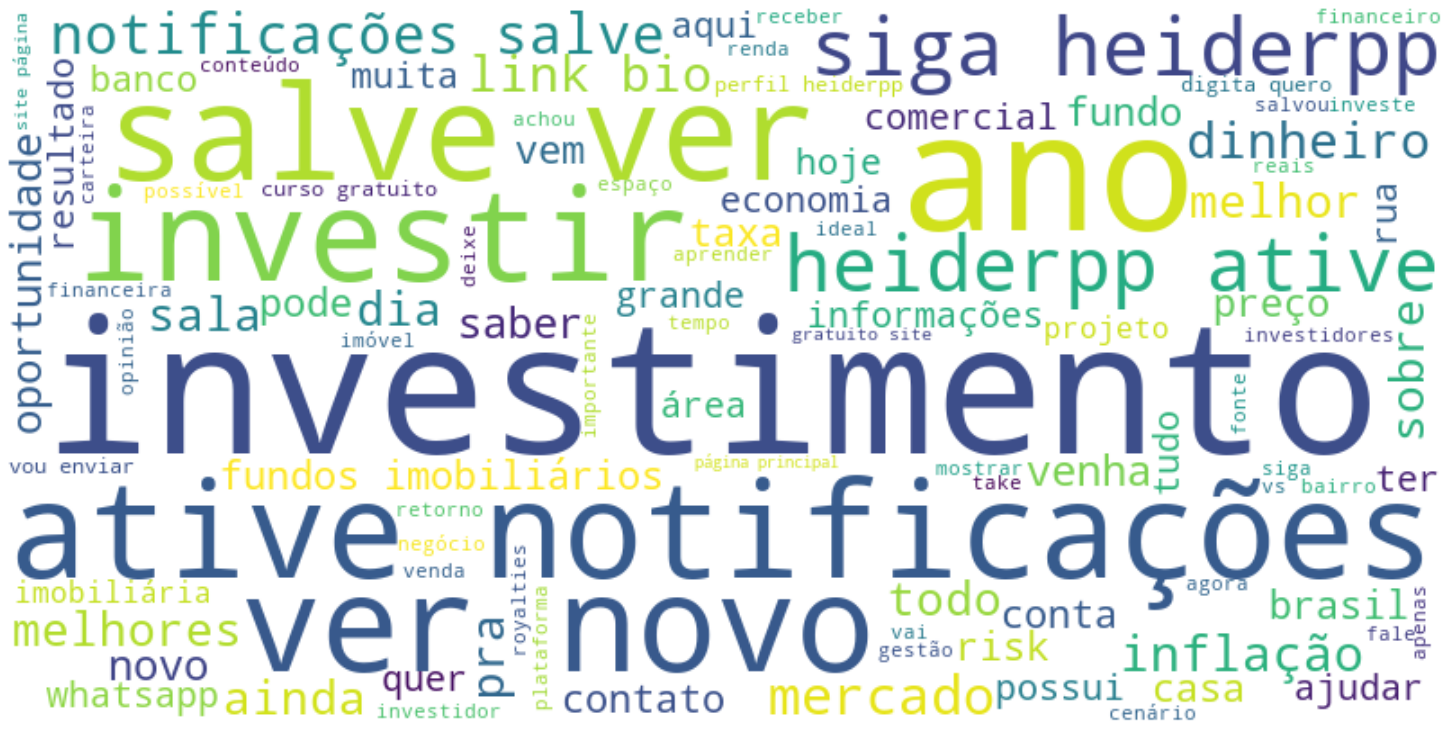

In [112]:
wc = WordCloud(background_color="white", width=800, height=400, max_words=100)
wc.generate(all_text_newwords)

plt.figure( figsize=(20,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [113]:
stop = stopwords.words('portuguese')

In [114]:
stop.extend(['sobre', 'ter', 'vem', 'bio', 'pode', 'aqui'])

In [115]:
clean_posts_words = [' '.join([word for word in word_tokenize(text) if word not in stop]) for text in clean_posts]
all_text_newwords = ' '.join(clean_posts_words)

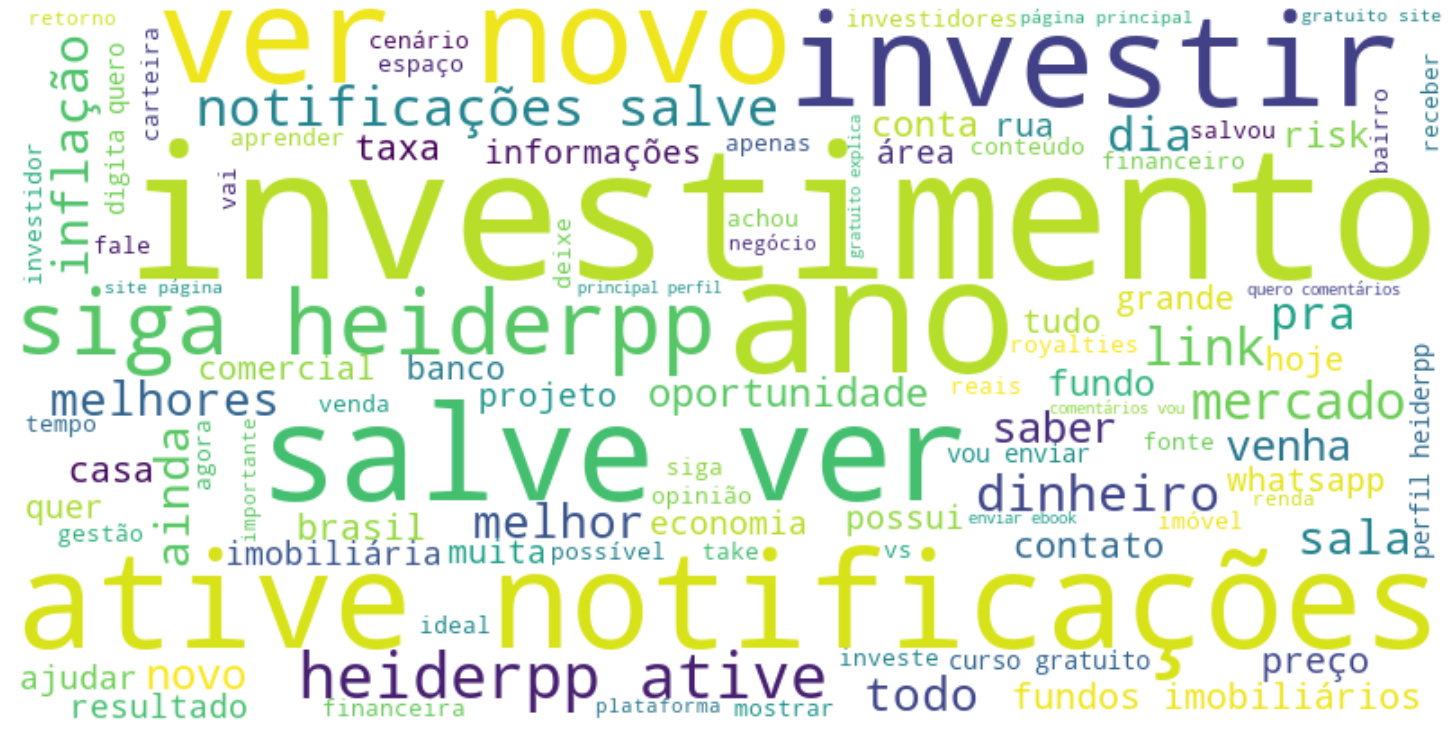

In [116]:
wc = WordCloud(background_color="white", width=800, height=400, max_words=100)
wc.generate(all_text_newwords)

plt.figure( figsize=(20,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [117]:
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [118]:
most_common = Counter(word_tokenize(remove_emojis(all_text_newwords))).most_common(15)

In [119]:
most_common

[('novo', 19),
 ('heiderpp', 18),
 ('investimentos', 16),
 ('siga', 15),
 ('ver', 14),
 ('link', 13),
 ('ative', 12),
 ('notificações', 12),
 ('salve', 12),
 ('investir', 11),
 ('to', 11),
 ('fundos', 10),
 ('the', 10),
 ('mercado', 9),
 ('comentários', 9)]

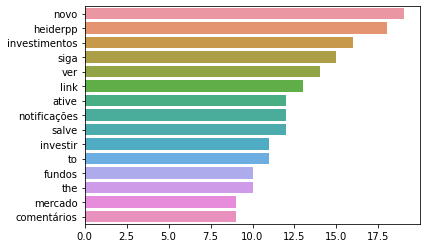

In [120]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
sns.barplot(x = frequency, y = words);

In [130]:
vec = CountVectorizer(stop_words= stop, ngram_range = (2, 2), min_df=5)
bow = vec.fit_transform(clean_posts_words)

count_values = bow.toarray().sum(axis=0)

ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

ngram_most_common = ngram_freq.head(15)

In [131]:
ngram_most_common

,frequency,ngram
0,12,ver novo
1,12,salve ver
2,12,ative notificações
3,11,siga heiderpp
4,11,notificações salve
5,11,heiderpp ative
6,6,fundos imobiliários
7,5,vou enviar
8,5,perfil heiderpp
9,5,digita quero


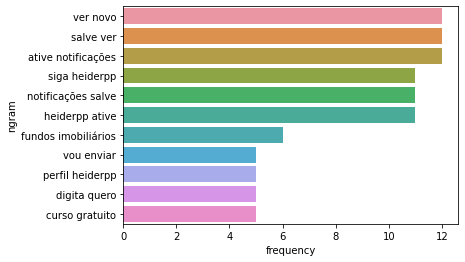

In [132]:
sns.barplot(x = ngram_most_common['frequency'], y = ngram_most_common['ngram']);

In [140]:
vec = TfidfVectorizer(stop_words= stop, ngram_range = (2, 2))
tf = vec.fit_transform(clean_posts_words)

count_values = tf.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

ngram_most_common = ngram_freq.head(10)

<AxesSubplot:xlabel='frequency', ylabel='ngram'>

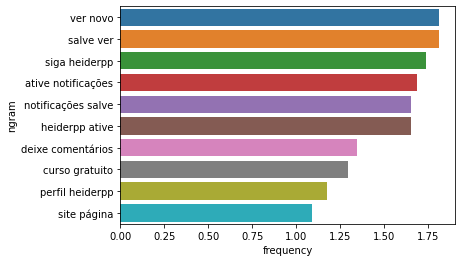

In [141]:
sns.barplot(x = ngram_most_common['frequency'], y = ngram_most_common['ngram'])

In [ ]:
# grupos?